In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st
import researchpy as rs
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm

In [3]:
df = pd.read_excel('Altura_peso.xlsx')

In [4]:
df.loc[0, 'Altura'] = 201
df.loc[0, 'Peso'] = 90

In [5]:
df.head()

,Individuo,Altura,Peso
0,1,201,90
1,2,160,50
2,3,171,76
3,4,160,65
4,5,180,72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Individuo  40 non-null     int64
 1   Altura     40 non-null     int64
 2   Peso       40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [7]:
df.describe().round(2)

,Individuo,Altura,Peso
count,40.00,40.00,40.00
mean,20.50,173.80,71.78
std,11.69,12.51,17.08
min,1.00,150.00,42.00
25%,10.75,167.00,60.00
50%,20.50,172.00,72.00
75%,30.25,182.25,78.50
max,40.00,201.00,125.00


In [8]:
variaveis = ['Altura', 'Peso']

In [9]:
z_variaveis = []
for var in variaveis:
    z_variaveis.append("z_" + var)

In [10]:
z_variaveis

['z_Altura', 'z_Peso']

In [11]:
# Transformando para o padrão-z
X = df[variaveis]
X_std = StandardScaler().fit_transform(X)

In [12]:
# Adicionando os valores padrão-z no dataframe
df = pd.concat([df, pd.DataFrame(X_std, columns=z_variaveis)], axis=1)

In [13]:
distance.cdist(df[variaveis], 
               df[variaveis], 'sqeuclidean')

array([[0.000e+00, 3.281e+03, 1.096e+03, ..., 3.449e+03, 1.010e+03,
        1.168e+03],
       [3.281e+03, 0.000e+00, 7.970e+02, ..., 4.000e+00, 8.730e+02,
        8.650e+02],
       [1.096e+03, 7.970e+02, 0.000e+00, ..., 8.450e+02, 2.000e+00,
        8.000e+00],
       ...,
       [3.449e+03, 4.000e+00, 8.450e+02, ..., 0.000e+00, 9.250e+02,
        9.050e+02],
       [1.010e+03, 8.730e+02, 2.000e+00, ..., 9.250e+02, 0.000e+00,
        1.000e+01],
       [1.168e+03, 8.650e+02, 8.000e+00, ..., 9.050e+02, 1.000e+01,
        0.000e+00]])

(-3.0, 3.0)

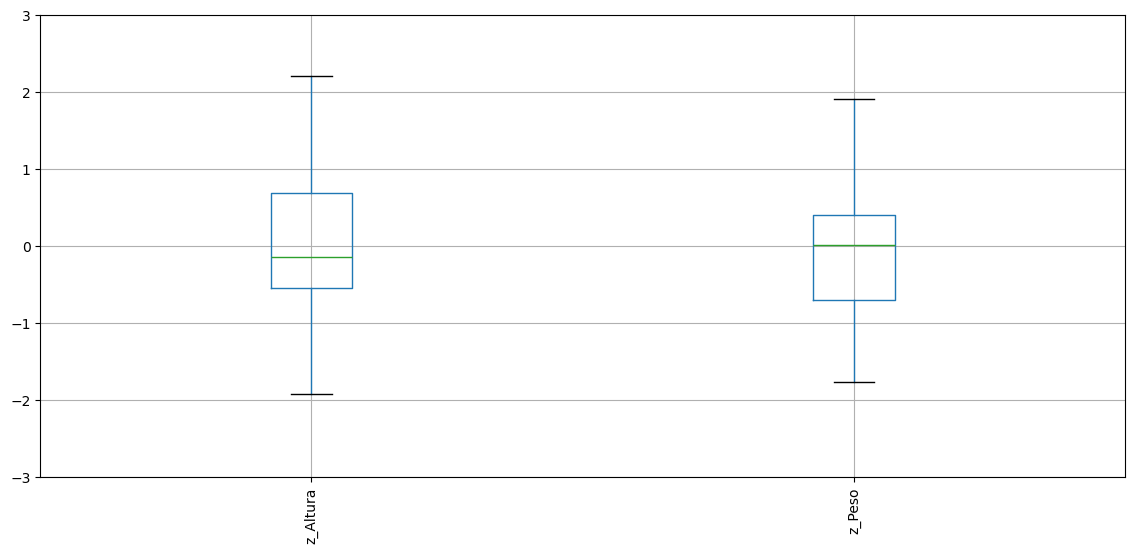

In [14]:
df[z_variaveis].boxplot(rot=90,figsize=[14,6])
plt.ylim(-3,3)

In [15]:
def mahalanobis(x=None, data=None, cov=None):
    """Computa a Distância de Mahalanobis entre cada objeto e a média  
    x    : vetor ou matriz de dados, com p colunas.
    data : ndarray dos dados a partir do qual a a Distância de Mahalanobis para cada observação de x deve ser computado.
    cov  : Matriz de covariancia (p x p) dos dados. Se None, ela será calculada a partir dos dados.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [16]:
# Calcula a distância de Mahalanobis para cada um dos casos.
df['mahala'] = mahalanobis(x=df[variaveis], data=df[variaveis])

In [17]:
# Criando o MinMaxScaler para o intervalo [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))

In [18]:
# Aplicando a transformação nas colunas numéricas
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
zeroAum_variaveis = []
for var in variaveis:
    zeroAum_variaveis.append("zeroAum_" + var)

In [20]:
df_scaled.columns = zeroAum_variaveis

In [21]:
df = pd.concat([df, df_scaled], axis=1)

In [22]:
# Criando o MinMaxScaler para o intervalo [-1,1]
scaler1 = MinMaxScaler(feature_range=(-1, 1))

In [23]:
# Aplicando a transformação nas colunas numéricas
df_scaled1 = pd.DataFrame(scaler1.fit_transform(X), columns=X.columns)

In [24]:
menosumAum_variaveis = []
for var in variaveis:
    menosumAum_variaveis.append("menosumAum_" + var)

In [25]:
df_scaled1.columns = menosumAum_variaveis

In [26]:
df = pd.concat([df, df_scaled1], axis=1)

In [27]:
df_mean_norm = (X - X.mean()) / (X.max() - X.min())

In [28]:
mediaUm_variaveis = []
for var in variaveis:
    mediaUm_variaveis.append("mediaUm_" + var)

In [29]:
df_mean_norm.columns = mediaUm_variaveis

In [30]:
df = pd.concat([df, df_mean_norm], axis=1)

In [31]:
df_max_amp = X / X.abs().max()

In [32]:
max_amp_variaveis = []
for var in variaveis:
    max_amp_variaveis.append("max_amp_" + var)

In [33]:
df_max_amp.columns = max_amp_variaveis

In [34]:
df = pd.concat([df, df_max_amp], axis=1)

In [35]:
df_zscore = (X - X.mean()) / X.std()

In [36]:
zscore_variaveis = []
for var in variaveis:
    zscore_variaveis.append("zscore_" + var)

In [37]:
df_zscore.columns = zscore_variaveis

In [38]:
df = pd.concat([df, df_zscore], axis=1)

In [39]:
df.head()

,Individuo,Altura,Peso,z_Altura,z_Peso,mahala,zeroAum_Altura,zeroAum_Peso,menosumAum_Altura,menosumAum_Peso,mediaUm_Altura,mediaUm_Peso,max_amp_Altura,max_amp_Peso,zscore_Altura,zscore_Peso
0,1,201,90,2.201798,1.080743,120.272019,1.000000,0.578313,1.000000,0.156627,0.533333,0.219578,1.000000,0.720,2.174101,1.067148
1,2,160,50,-1.117089,-1.291258,90.503533,0.196078,0.096386,-0.607843,-0.807229,-0.270588,-0.262349,0.796020,0.400,-1.103037,-1.275015
2,3,171,76,-0.226656,0.250543,75.090966,0.411765,0.409639,-0.176471,-0.180723,-0.054902,0.050904,0.850746,0.608,-0.223805,0.247391
3,4,160,65,-1.117089,-0.401758,69.541842,0.196078,0.277108,-0.607843,-0.445783,-0.270588,-0.081627,0.796020,0.520,-1.103037,-0.396704
4,5,180,72,0.501880,0.013343,98.655217,0.588235,0.361446,0.176471,-0.277108,0.121569,0.002711,0.895522,0.576,0.495567,0.013175
